

## Learning Objectives:
By the end of the lesson, all learners will be able to (minimum expected from everyone) :
- Revise on the rate of convergence of a neural network affected by the selection of learning rates  
- Use various learning rate scheduling methods for faster convergence of a neural network


## Learning Rate Scheduling

Learning Rate Scheduling is the process of changing the learning rate of a model in some prespecified timing. There are various ways in which we can change the learning rate during training of the model. Generally, we reduce the learning rate after a certain number of epochs.

The learning rate can be scheduled in different ways. Following are the various types of learning rate scheduling.




### Constant Learning Rate

Constant Learning Rate is the primary technique of learning rate scheduling where the learning rate is set to some constant value for all epochs, and never decayed or changed.

This method is very easy to implement as the learning rate is set at the beginning and no change is needed. The problem with this method is that the same learning rate might be good for early epochs but might be high for the later epochs of training. Hence, the model training with constant learning rate might never converge.

We need to preserve the weights learned from early epochs of training. This can be achieved by decreasing the learning rate in later epochs.





### Time based decay

Time based decay is a learning rate decaying algorithm that decreases the learning rate based upon time. We can say that the learning rate at some epoch is inversely proportional to the current number of epochs. We can calculate the new learning rate from the old learning rate by using the following equation.

$$lr_{n+1} = \frac{1}{1+epoch\times decay}lr_{n}$$
where,

$lr_{n+1}$ is the new learning rate,

$lr_{n}$ is the old learning rate,

$epoch$ is the current number of epoch,

$decay$ is the decay factor (hyperparameter).
<center>
<figure>


<p>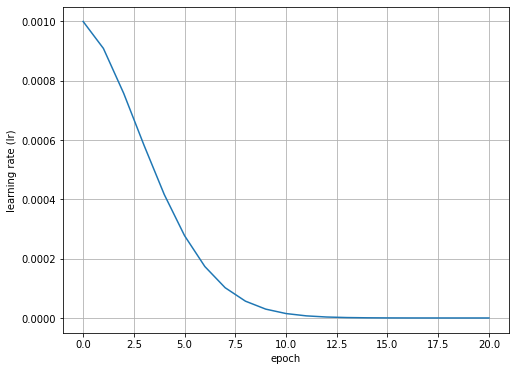</p>
<figcaption align="center">Figure 1: Time based decay</figcaption>
</figure>
</center>
In the above figure, we start with initial learning rate of 0.001 and apply learning rate decay in each epoch. The decay used is 0.1 and applied for 21 epochs. The progression of learning rates at each epoch can be observed to be:

$$
0.001 \rightarrow
 0.00091 \rightarrow
 0.000758 \rightarrow
 0.000583 \rightarrow
 0.0004163 \rightarrow
 0.0002775 \rightarrow
 0.0001734 \rightarrow
 0.000102 \hspace{2mm} \cdots
$$





### Step Decay

Step decay is also a learning rate scheduling method in which the learning rate is decreased in stepwise fashion. The learning rate is constant for a certain number of epochs and changes to new value. This step wise decay of learning rate can be computed by using following equations.

$$lr_{n} = lr_{0}\times decay\_factor$$
where,
$$
decay\_factor = decay\_rate^{floor(fraction)}
$$
$$
fraction = \frac{(epoch+1) - start\_decay\_epoch}{decay\_every}
$$

Here, fraction is calculated and its floor value is used to set decay factor. The factor is used to scale the initial learning rate. If we take initial learning rate of 0.001, decay every 20 epochs, with decay rate of 0.5, starting decay process at epoch 0, we get the learning rate plots as below:
<center>
<figure>


<p>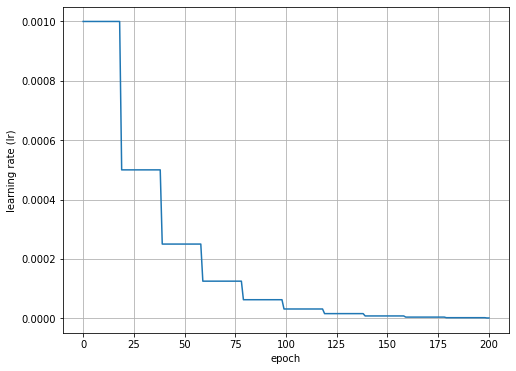</p>
 <figcaption align="center">Figure 2: Step decay</figcaption>
</figure>
</center>
We can observe that the learning rate decreases every 20 epochs. The progression of learning rates at every step can be observed as:

$$
 0.001 \rightarrow
 0.0005 \rightarrow
 0.00025 \rightarrow
 0.000125 \rightarrow
 6.25 \times 10^{-5} \rightarrow
 3.125 \times 10^{-5} \rightarrow
 \cdots
$$





### Exponential decay

Exponential decay is another learning rate scheduling method. In this method we decay the learning rate in the exponential rate. This exponential decaying can be calculated as follows:

$$lr_{n+1} = lr_{n} \times e^{-(epoch+1)\times decay}$$

where,

$epoch$ is the current number of epoch,

$decay$ is the decay factor (hyperparameter).


If we take the initial learning rate to be 0.001 and the decay factor to be 0.03, doing the exponential decay for 50 epochs gives us the learning rates as plotted below.
<center>
<figure>


<p>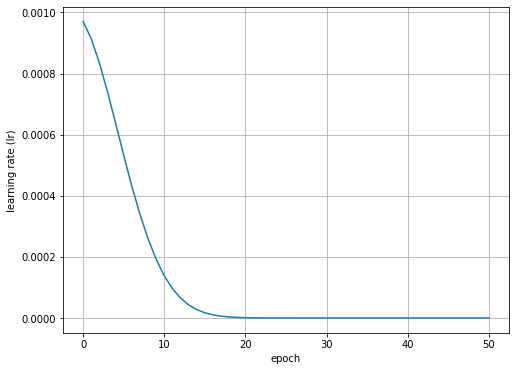</p>
<figcaption align="center">Figure 3: Exponential decay</figcaption>
</figure>
</center>



### Cyclic Learning Rate Schedule

Cyclic learning rate schedule is a special type of learning rate scheduling where the learning rate varies between base learning rate and maximum learning rate in periodic fashion. The learning rate might take certain epochs to change from base to maximum learning rate.
<center>
<figure>


<p>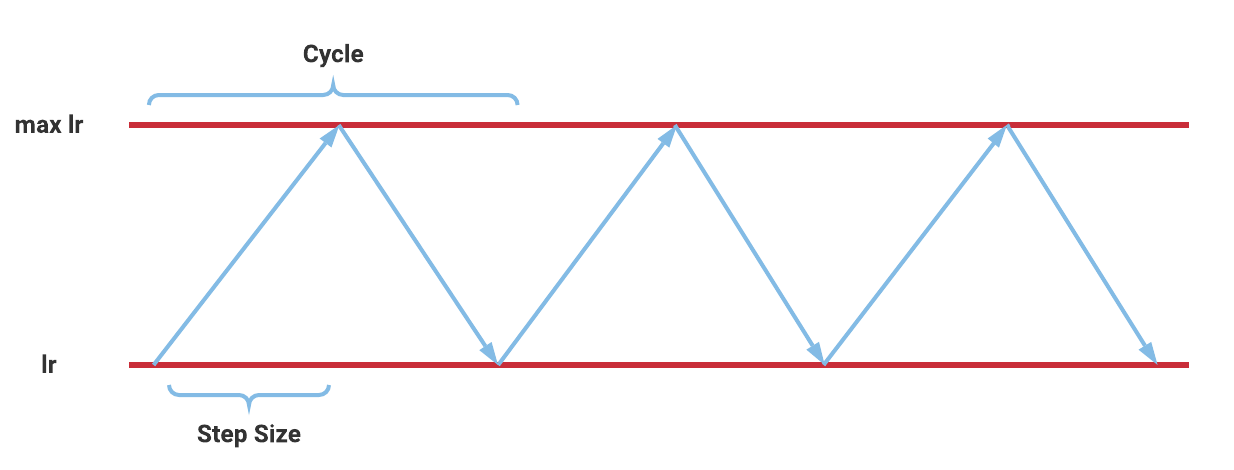</p>
<figcaption align="center">Figure 4: Cyclic Learning Rate</figcaption>
</figure>
</center>
We have studied the decaying learning rate. This is not decaying, but is cyclic. The logic behind using cyclic learning rate is that periodic higher learning rates help models come out of any saddle points or local minima.







Real world data is irregular and random in nature. Using the constant learning rate, the model might not even converge. The model can suffer from local gradients problem. So, the main **advantage** of learning rate scheduling is to speed up the learning process and faster convergence of the model.

We talked about the advantage of learning rate scheduling but sometimes it can be troubling too. The **disadvantage** of learning rate scheduling is that some data might be perfectly linear and in such cases, using the scheduling process can decrease the rate of convergence instead of improving it.

But, overall their use has been proven to have a positive impact on the convergence time of a model.




### Limitations

*   Learning rate scheduling mainly depends on hyperparameters which should define manually before training and depends upon type of problem and model.
*   Learning rate scheduling uses the same learning rate to update all the parameters which is not good for the model having sparse data.

Therefore, these limitations are solved by another optimization technique known as Adaptive Learning Rate. Some of the examples of Adaptive learning rate are AdaGrad, AdaDelta, RMSprop, Adam, etc.





### Contrast all the learning rates

Learning Rate is one of the Hyperparameters of a Neural Network. It determines the step size of gradient descent update in each iteration. We usually specify the learning rate at first and train our model with it. There are many possible outcomes with varying learning rates. We can see the various paths the error takes while using varying learning rates in the figure below.
 <center>
<figure>


<p>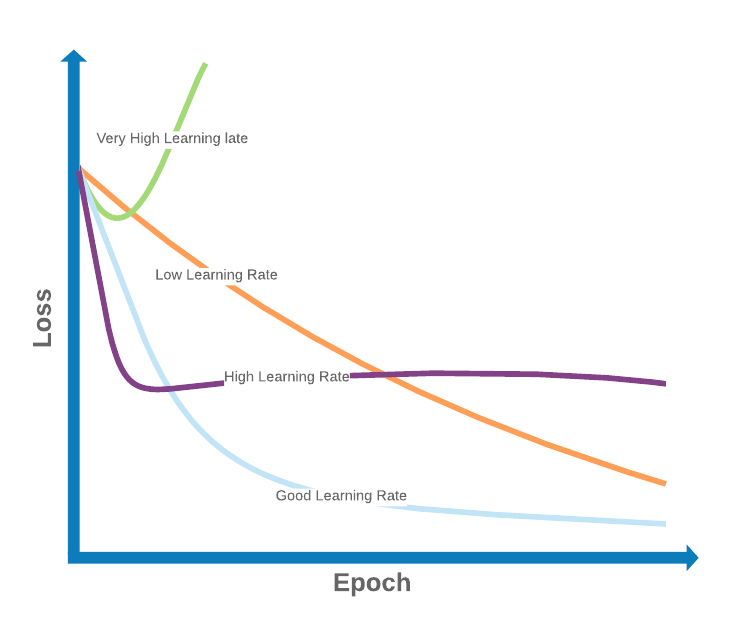</p>
<figcaption align="center">Figure 5: Effect of Various Learning Rates on Error value</figcaption>
</figure>
</center>


There are mainly four different distinct possible categories of learning rates. Following is the explanation of it.

- **Very high learning rate:** When the learning rate is very high, the model can not learn, it will increase the error after taking gradient descent steps. The model cannot converge at the minimum error point given by the cost function, it will overshoot and time of convergence will be very high.

- **High learning rate:** When the learning rate is high, the model learns but it cannot reach the minimum value. This is because the parameters jump around the minimum due to large learning rate.

- **Good learning rate:** When the learning rate is good, the model improves on each iteration till it reaches minimum. It avoids the problem of slow convergence and oscillating loss around minima.

- **Low learning rate:** When the learning rate is low, the decrease in error on each iteration is small. It takes a long time to reach minimum error value. It might also get stuck at local minima.







## Learning Rate Scheduling in Pytorch


### Import torch and required libraries


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import numpy as np

#### Preparing DataLoaders


In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=16)
test_dataloader = DataLoader(test_data, batch_size=16)
# # Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"

100%|██████████| 26.4M/26.4M [00:12<00:00, 2.14MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 172kB/s]
100%|██████████| 4.42M/4.42M [00:03<00:00, 1.44MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 325kB/s]


In [3]:
print(device)

cpu


#### Defining Model


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

#### Implement Exponential Learning Rate Decay in optimizer

exponential LR decay = old $l r * e^{-(e p o c h+1) * d e c a y_{-} r a t e}$


In [ ]:
learning_rate = 1e-3
batch_size = 16
epochs = 5

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

decayRate = 0.96
exp_decay_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decayRate)

#### Defining Training and Testing Loop


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss = []
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            train_loss.append(loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    exp_decay_lr_scheduler.step()
    return np.average(train_loss)

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

#### Finally, Train the Model


In [ ]:
train_losses, val_losses = [], []

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    avg_train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    avg_test_loss = test_loop(test_dataloader, model, loss_fn)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_test_loss)

print("Done!")

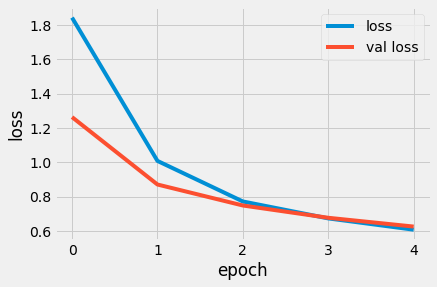

In [ ]:
#loss plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(train_losses,label='loss')
plt.plot(val_losses,label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

## Learning Rate Scheduling in Tensorflow(Keras)


### Import Tensorflow and required libraries


In [5]:
# % tensorflow_version 2.x
import tensorflow as tf
from sklearn import model_selection as ms

# here we import Sequential where we can add or stack different layer of neural network
from tensorflow.keras.models import Sequential
# Dense layer implements operation = activation(dot(input,weight)+bias)
from tensorflow.keras.layers import Dense, Softmax, Dropout

tf.__version__

'2.19.0'

### Load Dataset (Train, Test, Validation)


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1,28*28)/255
x_test = x_test.reshape(-1,28*28)/255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
x_train,x_val,y_train,y_val=ms.train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [8]:
print("Train",x_train.shape,y_train.shape)
print("Test",x_test.shape,y_test.shape)
print("Validation",x_val.shape,y_val.shape)

Train (48000, 784) (48000,)
Test (10000, 784) (10000,)
Validation (12000, 784) (12000,)


## Define Model (classifier)


In [9]:
#defining number of neurons at different layer, number of layer ,input and output size
#why input size is 784 and output is 10? discussed above
input_size=784
hidden_1_shape=256
hidden_2_shape=128
hidden_3_shape=50
output_size=10

In [10]:
model=Sequential([Dense(hidden_1_shape,input_shape=(input_size,), activation="relu"),
                  Dropout(0.2),
                  Dense(hidden_2_shape, activation="relu"),
                  Dropout(0.2),
                  Dense(hidden_3_shape, activation="relu"),
                  Dropout(0.2),
                  Dense(output_size),
                  Softmax()])

/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-27 16:11:58.619407: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Implement Exponential Learning Rate Decay in optimizer

exponential LR decay = old $l r * e^{-(e p o c h+1) * d e c a y_{-} r a t e}$


In [11]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                                                             decay_steps=20,
                                                             decay_rate=0.96,   # 0.1 * 0.96 = new_learning_rate
                                                             staircase=True)

In [12]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,816 (940.69 KB)

 Trainable params: 240,816 (940.69 KB)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluating Model


In [20]:
#training model
history = model.fit(x_train,y_train,batch_size=128,
          validation_data=(x_val,y_val),epochs=5)

Epoch 1/5
 26/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8360 - loss: 0.4770

2025-06-27 16:14:12.875696: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8266 - loss: 0.5012 - val_accuracy: 0.8432 - val_loss: 0.4406
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8206 - loss: 0.5099 - val_accuracy: 0.8432 - val_loss: 0.4406
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8195 - loss: 0.5097 - val_accuracy: 0.8432 - val_loss: 0.4406
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8225 - loss: 0.5088 - val_accuracy: 0.8432 - val_loss: 0.4406
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8231 - loss: 0.5043 - val_accuracy: 0.8432 - val_loss: 0.4406


In [21]:
# calculating total loss and accuracy in test set
loss, accuracy=model.evaluate(x=x_test, y=y_test, batch_size=128,verbose=2)
print('loss = ',loss, ', accuracy = ',accuracy)

79/79 - 0s - 3ms/step - accuracy: 0.8339 - loss: 0.4614
loss =  0.46135619282722473 , accuracy =  0.833899974822998


In [22]:
# predicting value at final layer for each example
prediction=model.predict(x_test)
# choosing class with highest probability
predicted=tf.argmax(prediction,axis=1)
predicted.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


TensorShape([10000])

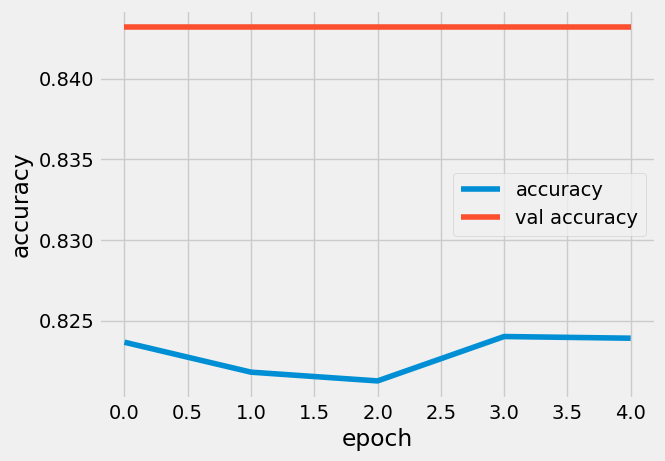

In [23]:
# accuracy plots.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

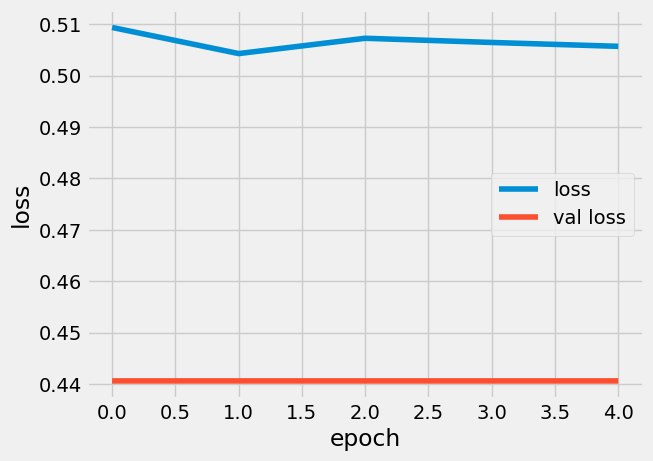

In [24]:
#loss plot
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

This is how, we can implement learning rate scheduling. As you can see their is a built in function in keras to implement exponential decay.


## Key Takeaways

* Learning Rate Scheduling is the process of changing the learning rate of a model in some prespecified timing.

* While using constant learning rate, the learning rate can be right for the initial epochs but might be higher for later epochs, so time of convergence is increased.

* For faster rate of convergence, the learning rate should be decayed with no. of epochs to come.

* No. of epochs are inversely proportional to the learning rate when learning rate decay is performed.

* Exponential decay is a learning rate scheduling methid method where the learning rate decays in the exponential rate.

* Step decay is also a learning rate scheduling method in which the learning rate is decreased in stepwise fashion. In stepwise decay, learning rate is constant for a certain number of epochs and changes to new value.

* Time based decay is a learning rate decaying algorithm that decreases the learning rate based upon time.

